In [74]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from config import g_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [86]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12f636f63349a3a0857157186c4992dc


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12f636f63349a3a0857157186c4992dc&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50n"}],"base":"stations","main":{"temp":54.45,"feels_like":54.01,"temp_min":51.69,"temp_max":56.79,"pressure":1017,"humidity":94},"visibility":3219,"wind":{"speed":17.27,"deg":20},"clouds":{"all":100},"dt":1664930959,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1664880265,"sunset":1664922076},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 54.45,
  'feels_like': 54.01,
  'temp_min': 51.69,
  'temp_max': 56.79,
  'pressure': 1017,
  'humidity': 94},
 'visibility': 3219,
 'wind': {'speed': 17.27, 'deg': 20},
 'clouds': {'all': 100},
 'dt': 1664930959,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664880265,
  'sunset': 1664922076},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys'] 

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1664880265,
 'sunset': 1664922076}

In [18]:
boston_data['sys'] ['country'] 

'US'

In [19]:
boston_data["dt"]

1664930959

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 56.79 94 100 17.27


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 10, 5, 0, 49, 19)

In [22]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-05 00:49:19'

In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | cumana
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | vila
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | conceicao do araguaia
Processing Record 14 of Set 1 | manaure
Processing Record 15 of Set 1 | ridgetown
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | yuli
Processing Record 18 of Set 1 | zhuanghe
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | lakeside
Processing Record 22 of Set 1 | waingapu
Processing Record 23 of Set 1 | coquimbo
Processing Record 24 of Set 1 | hermanus
Processing Record 25 of Set 1 |

City not found. Skipping...
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | veshenskaya
Processing Record 41 of Set 4 | thasra
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | teya
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | sioux lookout
Processing Record 47 of Set 4 | shirgaon
Processing Record 48 of Set 4 | nanakuli
Processing Record 49 of Set 4 | sydney mines
Processing Record 50 of Set 4 | kismayo
Processing Record 1 of Set 5 | grand centre
City not found. Skipping...
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | vila franca do campo
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | luanda
Processing Record 6 of Set 5 | srivardhan
Processing Record 7 of Set 5 | tautira
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | pangnirtung
Processing Record 10 of Set 5 | anuradhapura
Processing Record 11 

Processing Record 28 of Set 8 | warqla
City not found. Skipping...
Processing Record 29 of Set 8 | severo-kurilsk
Processing Record 30 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 31 of Set 8 | panzhihua
Processing Record 32 of Set 8 | pahrump
Processing Record 33 of Set 8 | chiman
Processing Record 34 of Set 8 | huilong
Processing Record 35 of Set 8 | ucluelet
Processing Record 36 of Set 8 | tir pol
City not found. Skipping...
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | svetlaya
Processing Record 39 of Set 8 | bhongir
Processing Record 40 of Set 8 | bacolod
Processing Record 41 of Set 8 | idaho falls
Processing Record 42 of Set 8 | caconde
Processing Record 43 of Set 8 | auki
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | bemidji
Processing Record 46 of Set 8 | moa
Processing Record 47 of Set 8 | derzhavinsk
Processing Record 48 of Set 8 | morant bay
Processing Record 49 of Set 8 | villa bruzual
Processing Record 

Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | awbari
Processing Record 14 of Set 12 | simao
Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | chemal
Processing Record 17 of Set 12 | alofi
Processing Record 18 of Set 12 | tidore
City not found. Skipping...
Processing Record 19 of Set 12 | wajir
Processing Record 20 of Set 12 | erzin
Processing Record 21 of Set 12 | zelenoborskiy
Processing Record 22 of Set 12 | beloha
Processing Record 23 of Set 12 | bandarbeyla
Processing Record 24 of Set 12 | copiapo
Processing Record 25 of Set 12 | helong
Processing Record 26 of Set 12 | astana
Processing Record 27 of Set 12 | kardzhin
Processing Record 28 of Set 12 | hambantota
Processing Record 29 of Set 12 | verkhnevilyuysk
Processing Record 30 of Set 12 | saint-louis
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | abu kamal
Processing Record 33 of Set 12 | soria
Processing Record 34 of Set 12 | aksarka
Processing Record 35

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


In [26]:
# displaying first 10 rows of the dataframe
city_data_df.head (10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,64.83,57,23,19.30,AU,2022-10-05 00:50:46
1,Cumana,10.4635,-64.1775,80.46,82,79,6.96,VE,2022-10-05 00:50:54
2,Atuona,-9.8000,-139.0333,77.09,67,73,21.36,PF,2022-10-05 00:46:46
3,Bluff,-46.6000,168.3333,39.79,68,95,29.62,NZ,2022-10-05 00:50:54
4,Upernavik,72.7868,-56.1549,19.94,81,78,5.26,GL,2022-10-05 00:50:55
5,Saint George,37.1041,-113.5841,88.39,25,0,3.00,US,2022-10-05 00:50:40
6,Mataura,-46.1927,168.8643,39.47,98,100,11.68,NZ,2022-10-05 00:50:55
7,Necochea,-38.5473,-58.7368,50.49,78,30,14.99,AR,2022-10-05 00:50:56
8,Vila,42.0304,-8.1588,49.08,54,0,3.29,PT,2022-10-05 00:50:56
9,Ponta Do Sol,32.6667,-17.1000,71.71,72,40,1.99,PT,2022-10-05 00:50:56


In [38]:
# Renaming the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

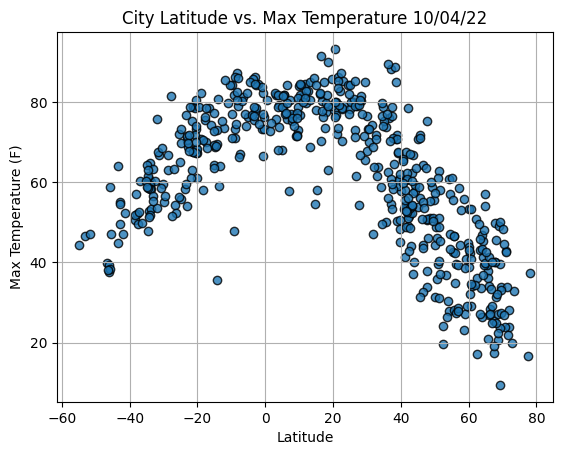

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

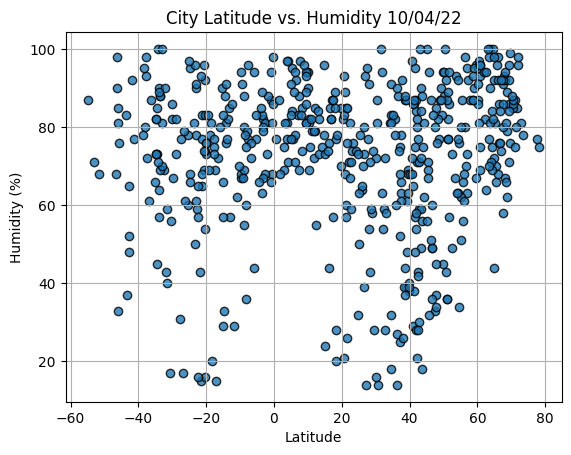

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

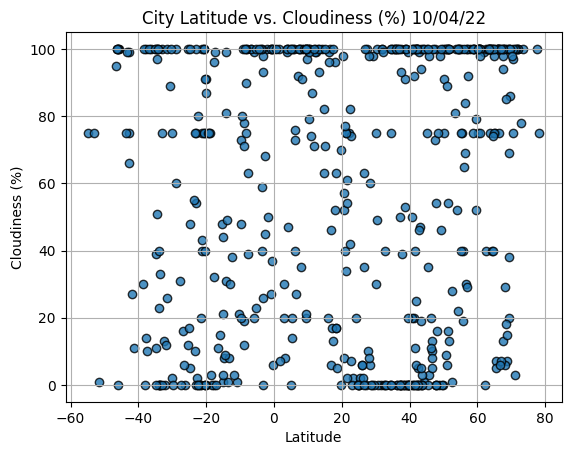

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

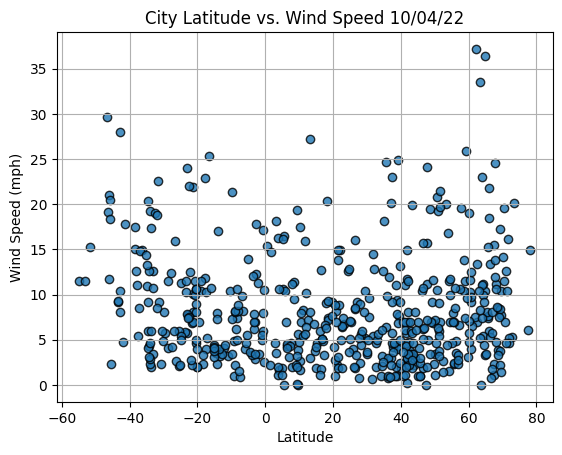

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                      Manaure
Country                        CO
Date          2022-10-05 00:50:58
Lat                       11.7751
Lng                      -72.4445
Max Temp                    84.69
Humidity                       72
Cloudiness                     71
Wind Speed                   15.9
Name: 13, dtype: object

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

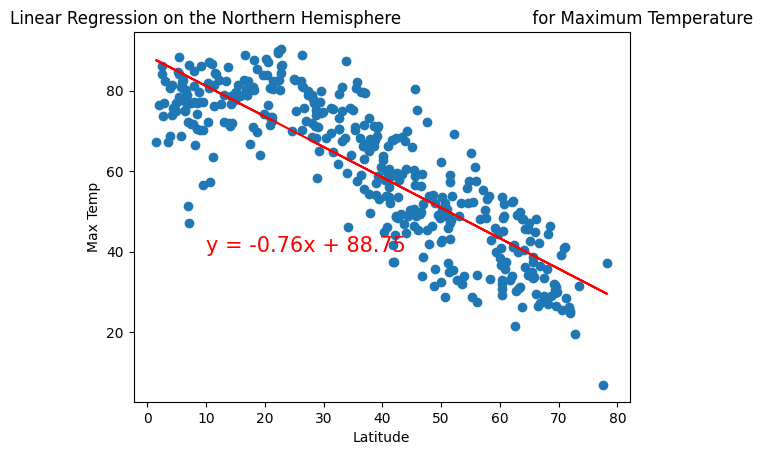

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

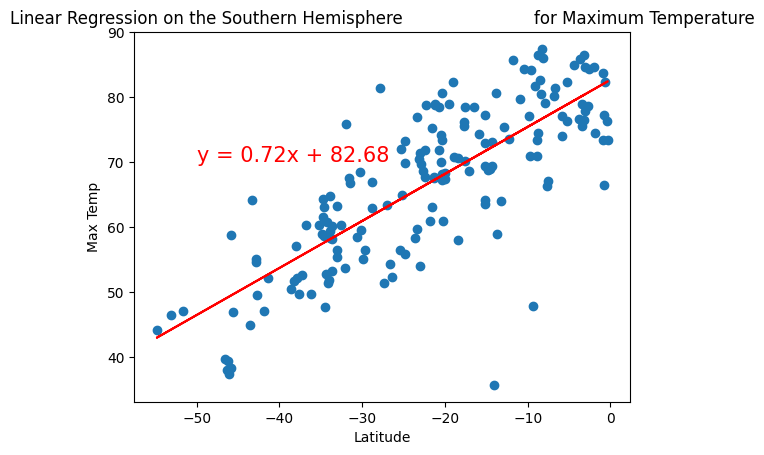

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,70))

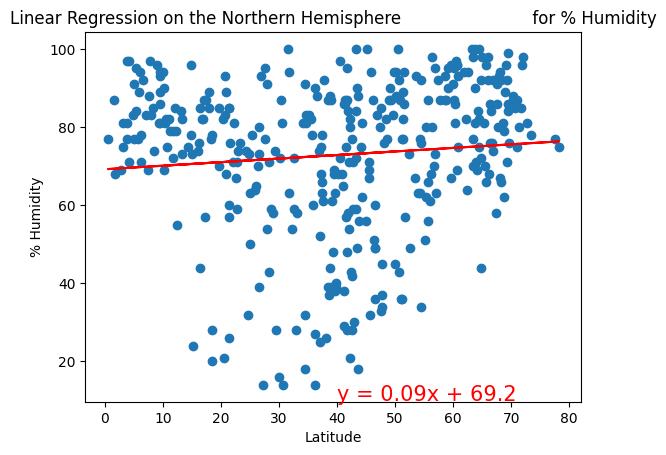

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

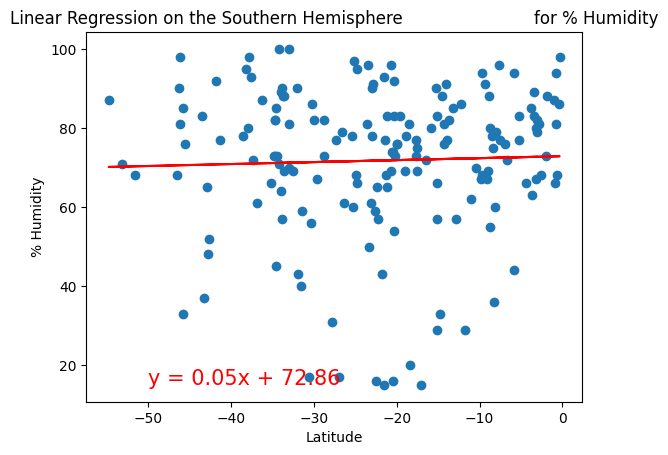

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

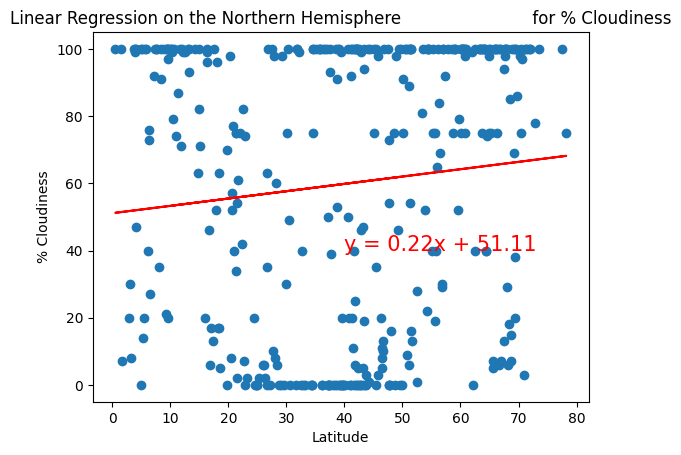

In [49]:
# Linear regression on the Norhern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

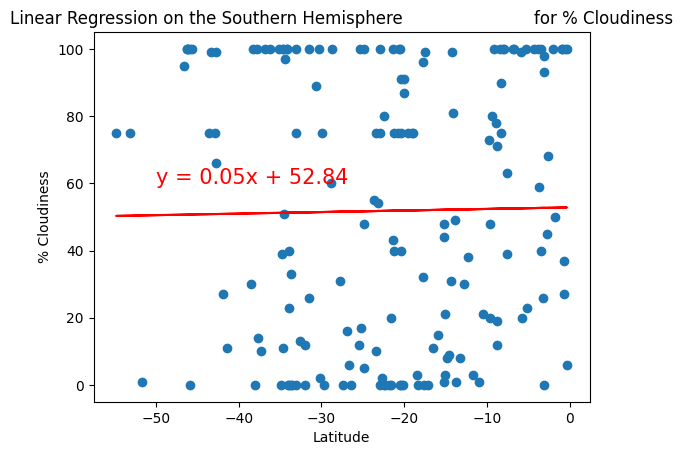

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

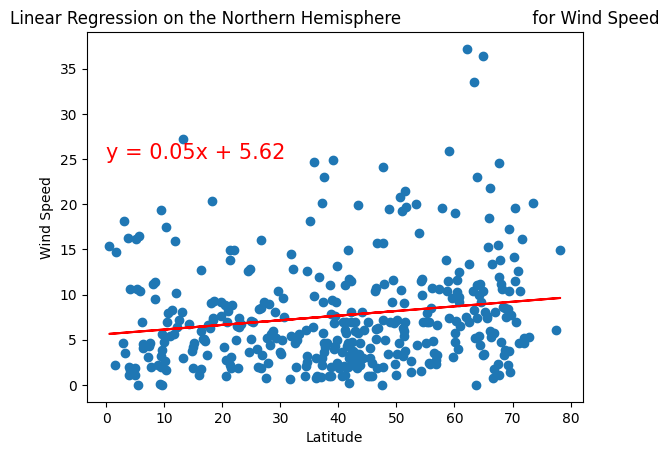

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

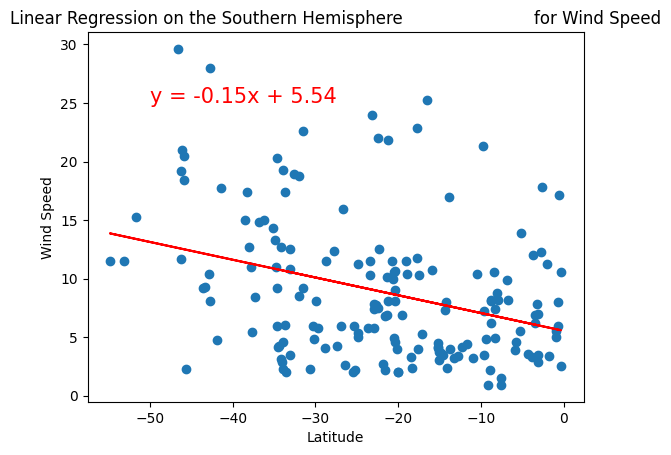

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [53]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [54]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cumana,VE,2022-10-05 00:50:54,10.4635,-64.1775,80.46,82,79,6.96
2,Atuona,PF,2022-10-05 00:46:46,-9.8000,-139.0333,77.09,67,73,21.36
5,Saint George,US,2022-10-05 00:50:40,37.1041,-113.5841,88.39,25,0,3.00
12,Conceicao Do Araguaia,BR,2022-10-05 00:50:57,-8.2578,-49.2647,87.44,36,75,7.38
13,Manaure,CO,2022-10-05 00:50:58,11.7751,-72.4445,84.69,72,71,15.90
21,Waingapu,ID,2022-10-05 00:51:03,-9.6567,120.2641,84.22,68,48,7.27
25,Puerto Lopez,CO,2022-10-05 00:51:04,4.0845,-72.9560,79.36,71,47,1.61
26,Kapaa,US,2022-10-05 00:51:05,22.0752,-159.3190,82.72,71,75,14.97
30,Santo Antonio Do Ica,BR,2022-10-05 00:51:07,-3.1022,-67.9397,77.83,82,93,2.84
33,Avarua,CK,2022-10-05 00:50:16,-21.2078,-159.7750,78.85,65,40,21.85


In [55]:
preferred_cities_df.count()

City          155
Country       155
Date          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
dtype: int64

In [56]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Cumana,VE,80.46,10.4635,-64.1775,
2,Atuona,PF,77.09,-9.8000,-139.0333,
5,Saint George,US,88.39,37.1041,-113.5841,
12,Conceicao Do Araguaia,BR,87.44,-8.2578,-49.2647,
13,Manaure,CO,84.69,11.7751,-72.4445,
21,Waingapu,ID,84.22,-9.6567,120.2641,
25,Puerto Lopez,CO,79.36,4.0845,-72.9560,
26,Kapaa,US,82.72,22.0752,-159.3190,
30,Santo Antonio Do Ica,BR,77.83,-3.1022,-67.9397,
33,Avarua,CK,78.85,-21.2078,-159.7750,


In [61]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'AcYSjRiEn-K0GjNi82w7xAJ49KpFPV7zgNJQB0yQxeIiD8UfkfizOYqZ6SX3DmsToTG23MzkBVdf6Z2q06NP_z2HCWsIuMIDfDbwmfYO2ba_j2BVHeZXvmn4_FEamOlQy9fFLdcLdZT_OCRdRDztVgPYtlge0DdPxx5njNa4xWn0cjYgQP16_jSJXon578ysOACbhdRTd3tKUWcZhGDaU_lHyxhHb-QNTGLIDTI6_0P6KP7uq3k1P871fYHHhKshN6lgMwURQ3LUVwva15LgYmCnLKciOVD3zhzyDgXjAD2KESoByOmeaiyN_GsD5xNGMitEisKeMnZd8Qs9E-kylIPDqLwD1msmSfmO978oI1i0kHX1AHXycSgHWiplpZiiJY2_fAHLtKNkcQaoyKx95BZ0HNeTn1MhO2vthgehN4at9-PgW7YvV5fN8IB0',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [62]:
len(hotels["results"])

20

In [72]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")



Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [82]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

marker_layer = gmaps.marker_layer(locations)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [78]:
#Printing top 5 recommended hotels based on user's temperature preferences
hotel_df.head(5)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Cumana,VE,80.46,10.4635,-64.1775,Posada Acuarela Los Roques
2,Atuona,PF,77.09,-9.8000,-139.0333,Villa Enata
5,Saint George,US,88.39,37.1041,-113.5841,Best Western Plus Abbey Inn
12,Conceicao Do Araguaia,BR,87.44,-8.2578,-49.2647,Tarumã Tropical Hotel
13,Manaure,CO,84.69,11.7751,-72.4445,Hotel Palaaima


In [83]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [84]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [85]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))